In [1]:
import xarray as xr
"""import json
import urllib.request
import geopandas as gpd"""
import pandas as pd
import numpy as np
from ipyleaflet import Map, basemaps, Heatmap, ImageOverlay, LocalTileLayer
import matplotlib.pyplot as plt
from pyproj import Transformer



In [2]:
ds = xr.open_dataset('/Users/kris/amazonforcast/data/forecast/output/LIS_HIST_Forecast_June_02_to_05.nc')
# Extract the bounds
lat = ds["lat"].values
lon = ds["lon"].values
bounds = [[lat.min(), lon.min()], [lat.max(), lon.max()]]
#print(bounds)

# Set up transformer from EPSG:4326 to EPSG:3857
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)

# Transform lat/lon coordinates
x_min, y_min = transformer.transform(lon.min(), lat.min())
x_max, y_max = transformer.transform(lon.max(), lat.max())
values = ds['Rainf_tavg'].isel(time = 1).values

print(f"Projected bounds: x: ({x_min}, {x_max}), y: ({y_min}, {y_max})")

Projected bounds: x: (-9125412.540017596, -5457440.753901242), y: (-2388897.900064825, 666342.8470746574)


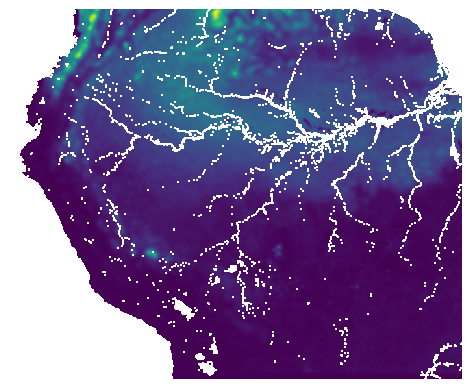

In [17]:
# 3. Plot and save the data
plt.imshow(values, cmap="viridis", extent=(lon.min(), lon.max(), lat.min(), lat.max()), origin="lower")
plt.axis("off")
plt.savefig("output.png", bbox_inches="tight", transparent=True)

In [19]:
# Use the saved image as an overlay
m = Map(center=(-6, -65), zoom=4,crs="EPSG3857")
overlay = ImageOverlay(url="output.png", bounds=bounds)  # Adjust bounds as needed
m.add(overlay)
m

TraitError: The 'crs' trait of a Map instance expected a dict, not the str 'EPSG3857'.

In [4]:
# Create a function to format the datetime values
def format_date(datetime_value):
    return str(datetime_value)[:10]  # Keep only the date part

In [5]:
for i in range(len(time)):
    fomratted_date = format_date(time[i].values)
    print(fomratted_date)

2024-06-02
2024-06-03
2024-06-04
2024-06-05


In [15]:
ds.attrs

{'missing_value': -9999.0,
 'NUM_SOIL_LAYERS': 4,
 'SOIL_LAYER_THICKNESSES': array([ 10.      ,  30.000002,  60.000004, 100.      ], dtype=float32),
 'title': 'LIS land surface model output',
 'institution': 'NASA GSFC',
 'source': '',
 'history': 'created on date: 2024-07-19T16:14:29.210',
 'references': 'Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007',
 'conventions': 'CF-1.6',
 'comment': 'website: http://lis.gsfc.nasa.gov/',
 'MAP_PROJECTION': 'EQUIDISTANT CYLINDRICAL',
 'SOUTH_WEST_CORNER_LAT': -20.975,
 'SOUTH_WEST_CORNER_LON': -81.975,
 'DX': 0.05,
 'DY': 0.05}

selecting

In [ ]:
selected_var = ds['SoilMoist_inst'].isel(time = 1, SoilMoist_profiles = 1)
selected_var

### Render netcdf as heatmap in ```ipyleaflet```

In [44]:
# Load datasets
ds = xr.open_dataset('/Users/kris/amazonforcast/data/forecast/output/LIS_HIST_Forecast_June_02_to_05_mean.nc')

#time = ds_ensemble_avg.time

values = ds['Rainf_tavg'].isel(time = 1).values.flatten()
lons = ds.east_west.values
lats = ds.north_south.values
# Normalize the values (if necessary)
#values = (values - np.nanmin(values)) / (np.nanmax(values) - np.nanmin(values))
# Create heatmap data
heatmap_data = [[lat, lon, val] for lat, lon, val in zip(lats, lons, values) if not pd.isnull(val)]

heatmap_data

[[-9.128014842300557, -70.13201820940819, 6.324491e-07],
 [-9.077922077922079, -70.08194233687405, 6.176514e-07],
 [-9.027829313543599, -70.03186646433991, 5.9410615e-07],
 [-8.97773654916512, -69.98179059180576, 5.641532e-07],
 [-8.927643784786643, -69.93171471927162, 5.297748e-07],
 [-8.877551020408163, -69.88163884673747, 4.917406e-07],
 [-8.827458256029685, -69.83156297420334, 4.5288763e-07],
 [-8.777365491651206, -69.7814871016692, 4.1404226e-07],
 [-8.727272727272728, -69.73141122913505, 3.7511003e-07],
 [-8.677179962894249, -69.68133535660091, 3.3702824e-07],
 [-8.62708719851577, -69.63125948406676, 3.0089677e-07],
 [-8.576994434137292, -69.58118361153262, 2.6662948e-07],
 [-8.526901669758812, -69.53110773899849, 2.358612e-07],
 [-8.476808905380334, -69.48103186646433, 2.0749567e-07],
 [-8.426716141001856, -69.4309559939302, 1.8101217e-07],
 [-8.376623376623376, -69.38088012139606, 1.5582779e-07],
 [-8.326530612244898, -69.33080424886191, 1.3103508e-07],
 [-8.27643784786642, -69

In [85]:
values = ds['Rainf_tavg'].isel(time = 1).values
values

array([[          nan,           nan,           nan, ..., 4.2355708e-07,
        3.8498865e-07, 3.5056061e-07],
       [          nan,           nan,           nan, ..., 4.0829519e-07,
        3.7149366e-07, 3.3847599e-07],
       [          nan,           nan,           nan, ..., 3.8475079e-07,
        3.5039014e-07, 3.1974193e-07],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], dtype=float32)

In [ ]:


m = Map(center=(-6, -65), zoom=4, basemaps = basemaps.Esri.WorldTopoMap)
#geo_data = GeoData(geo_dataframe = hydrobasins_lev05)
#m.add_layer(geo_data)
heat = Heatmap(locations=heatmap_data)
# Change some attributes of the heatmap
heat.radius = 30
heat.blur = 50
heat.max = 0.2
heat.gradient = {0.4: 'red', 0.6: 'yellow', 0.7: 'lime', 0.8: 'cyan', 1.0: 'blue'}

m.add_layer(heatmap)
m

In [ ]:
from random import uniform

m = Map(center=(-6, -65), zoom=4)
locations = [
    [uniform(-21.0, 6), uniform(-82, -49), uniform(0, 1000)] # lat, lng, intensity 
    for i in range(356400)
]
heat = Heatmap(locations=locations)
m.add_layer(heat)

# Change some attributes of the heatmap
heat.radius = 0.5
heat.blur = 0.01
heat.max = 0.9
heat.gradient = {0.4: 'red', 0.7: 'yellow', 0.7: 'lime', 0.8: 'cyan', 1.0: 'blue'}

m

as tile layer?

In [ ]:

bounds = [[lat.min(), lon.min()], [lat.max(), lon.max()]]

# Plot the variable and save as a transparent PNG
plt.figure(figsize=(10, 6))
plt.imshow(ds['Rainf_tavg'].isel(time = 1), cmap="viridis", extent=(lon.min(), lon.max(), lat.min(), lat.max()), origin='lower')
plt.axis("off")
plt.savefig("output.png", bbox_inches="tight", transparent=True)
plt.close()

# Use the saved image as an overlay
m = Map(center=(-6, -65), zoom=4,)
overlay = ImageOverlay(url="output.png", bounds=bounds)  # Adjust bounds as needed
m.add(overlay)
#m.add(LocalTileLayer(path='output.png'))
m